In [1]:
import pandas as pd


In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [3]:
df = pd.read_csv('Retail_Data_Transactions.csv')  

In [4]:
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [5]:
#Count the rows and they are 125000
df.count()

customer_id    125000
trans_date     125000
tran_amount    125000
dtype: int64

In [6]:
#number of unique customer ID
df['customer_id'].nunique()

6889

In [7]:
#Convert time stamp into proper format
df['Date'] = pd.to_datetime(df['trans_date'].astype(str), format='%d-%b-%y')

In [8]:
#View top five rows
df.head()

,customer_id,trans_date,tran_amount,Date
0,CS5295,11-Feb-13,35,2013-02-11
1,CS4768,15-Mar-15,39,2015-03-15
2,CS2122,26-Feb-13,52,2013-02-26
3,CS1217,16-Nov-11,99,2011-11-16
4,CS1850,20-Nov-13,78,2013-11-20


In [9]:
# We use groupby and aggregation to calculate R,F and M
df_final = df.groupby(['customer_id'], as_index = False).agg({'tran_amount': ['count', 'sum'], 'Date': 'max'})
df_final.columns = ['customer_id', 'f', 'm', 'r']

In [10]:
df_final.head()

,customer_id,f,m,r
0,CS1112,15,1012,2015-01-14
1,CS1113,20,1490,2015-02-09
2,CS1114,19,1432,2015-02-12
3,CS1115,22,1659,2015-03-05
4,CS1116,13,857,2014-08-25


In [11]:
#Find max date for last purchase in dataset
df_final['max_date'] = df_final['r'].max()

In [12]:
df_final.head()

,customer_id,f,m,r,max_date
0,CS1112,15,1012,2015-01-14,2015-03-16
1,CS1113,20,1490,2015-02-09,2015-03-16
2,CS1114,19,1432,2015-02-12,2015-03-16
3,CS1115,22,1659,2015-03-05,2015-03-16
4,CS1116,13,857,2014-08-25,2015-03-16


In [13]:
#Find the difference between absolute max date and max date for each customer to find Recency metric
df_final['r_max'] = df_final['max_date'] - df_final['r']

In [14]:
df_final.head()

,customer_id,f,m,r,max_date,r_max
0,CS1112,15,1012,2015-01-14,2015-03-16,61 days
1,CS1113,20,1490,2015-02-09,2015-03-16,35 days
2,CS1114,19,1432,2015-02-12,2015-03-16,32 days
3,CS1115,22,1659,2015-03-05,2015-03-16,11 days
4,CS1116,13,857,2014-08-25,2015-03-16,203 days


In [15]:
#Load in complimentary data for which customers responded to promotion
df_response = pd.read_csv('Retail_Data_Response.csv')  
df_response.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [16]:
#Merge two datasets
df_final = df_final.merge(df_response, how='right', on='customer_id')
df_final.head()

,customer_id,f,m,r,max_date,r_max,response
0,CS1112,15,1012,2015-01-14,2015-03-16,61 days,0
1,CS1113,20,1490,2015-02-09,2015-03-16,35 days,0
2,CS1114,19,1432,2015-02-12,2015-03-16,32 days,1
3,CS1115,22,1659,2015-03-05,2015-03-16,11 days,1
4,CS1116,13,857,2014-08-25,2015-03-16,203 days,1


In [17]:
#Create y value for response
y = df_final['response']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: response, dtype: int64

In [18]:
#Determine if there is an imbalance for responses
#Ten times more people did not respond to promotion than did respond
#Data is very imbalanced
y.value_counts()

0    6237
1     647
Name: response, dtype: int64

In [19]:
#Determine if there is null values for response which there isn't
y.isnull().sum()

0

In [20]:
#Drop columns for features so onle R, F, M remain
X = df_final.drop(columns=['customer_id', 'r', 'max_date', 'response'])
X.head()

,f,m,r_max
0,15,1012,61 days
1,20,1490,35 days
2,19,1432,32 days
3,22,1659,11 days
4,13,857,203 days


In [21]:
import matplotlib as plt

In [22]:
#Remove word 'days' in r_max
X['r_max'] = X['r_max'].dt.days.astype('int16')

In [23]:
#View first five rows
X.head()

,f,m,r_max
0,15,1012,61
1,20,1490,35
2,19,1432,32
3,22,1659,11
4,13,857,203


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDE4C37D68>]],
      dtype=object)

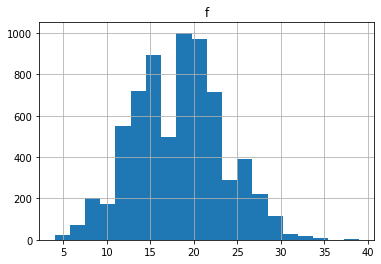

In [30]:
#Plot histogram to determine distribution
#Frequency has normal distribution
X.hist(column='f', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDE462DCC0>]],
      dtype=object)

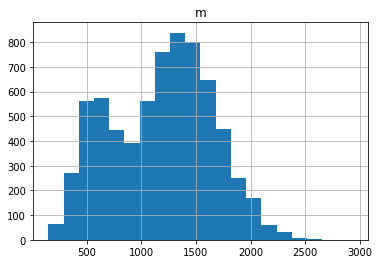

In [25]:
#Plot histogram to determine distribution
#Monetary has normal distribution
X.hist(column='m', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CDE4AD21D0>]],
      dtype=object)

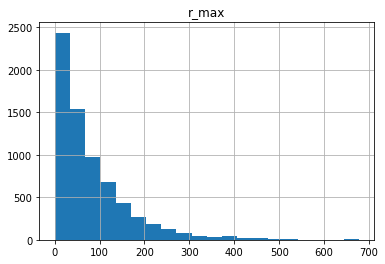

In [26]:
#Plot histogram to determine distribution
#Recency distribtion is left skewed 
X.hist(column='r_max', bins=20)

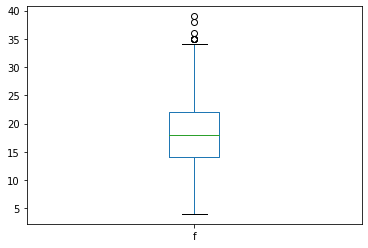

In [27]:
#Create a box plot to find outliers
#There are only four outliers above the maximum

X['f'].plot(kind='box');

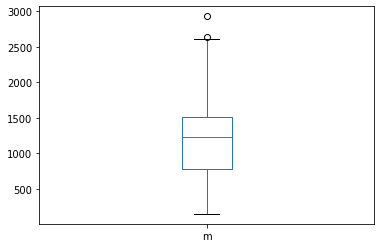

In [28]:
#Create a box plot to find outliers
#There are only two outliers above the maximum

X['m'].plot(kind='box');

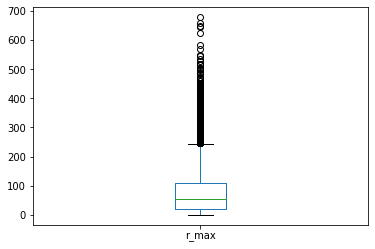

In [29]:
#Create a box plot to find outliers
#There are many outliers above the maximum
#Next we will train a decision tree model which is robust against outliers

X['r_max'].plot(kind='box');

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
#Create Decision Tree Classifier and train it
model = DecisionTreeClassifier(max_depth=100, criterion='entropy', random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=42)

In [30]:
#Create predictions
y_pred = model.predict(X_test)

In [31]:
#Calculate accuracy
#Accuracy is very high at 83%
accuracy_score(y_test, y_pred)

0.8327464788732394

In [32]:
#Calculate precision score
#Precision is very low at 18% due to high number of False Positives 
precision_score(y_test, y_pred)

0.18106995884773663

In [33]:
#Calculate recall score
#Recall is very low due to high number of False Negatives
recall_score(y_test, y_pred)

0.19555555555555557

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2047
           1       0.18      0.20      0.19       225

    accuracy                           0.83      2272
   macro avg       0.55      0.55      0.55      2272
weighted avg       0.84      0.83      0.84      2272



In [35]:
#Create confusion matrix to find TP, TN, FP and FN
#TP is very high, TN is very low and FP and FN are both high
confusion_matrix(y_test, y_pred)

array([[1848,  199],
       [ 181,   44]], dtype=int64)

In [36]:
#Create Linear Regression model and train it
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Calculate perdictions
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
#Calculate mean squared error
#The mean squared error is very low at 8.4%
mean_squared_error(y_test, y_pred)

0.08425882752565138

In [40]:
#Calculate r2 score
#The r2 score is very low which means the regression model did not fit the observed data
r2_score(y_test, y_pred)

0.05565278283412678

In [41]:
#Create Logistic Regression model and train it
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [42]:
#Calculate predictions
y_pred = lr.predict(X_test)

In [43]:
#Calculate accuracy score
#The accuracy is higher than the decision tree at 90%
accuracy_score(y_test, y_pred)

0.9014084507042254

In [44]:
#The precision and recall for the people who did not respond to the offer are 90% and 100% respectively
#The precision and recall for the people who did respond to the offer are 60% and 1% respectively
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2047
           1       0.60      0.01      0.03       225

    accuracy                           0.90      2272
   macro avg       0.75      0.51      0.49      2272
weighted avg       0.87      0.90      0.86      2272



In [45]:
#Create Random Forest model and train it
rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
#Calculate predictions
y_pred = rf.predict(X_test)

In [47]:
#Calculate accuracy score
#The accuracy is very good at 88.5%
accuracy_score(y_test, y_pred)

0.8855633802816901

In [48]:
#Create classification report
#The precision and recall for the people who didn't respond to the offer are 90% and 98% respectively
#The precision and recall for the people who did respond to the offer are 19% and 5% respectively
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2047
           1       0.19      0.05      0.08       225

    accuracy                           0.89      2272
   macro avg       0.55      0.51      0.51      2272
weighted avg       0.83      0.89      0.85      2272



In [49]:
#The response data is very imbalanced with 10 times more people responding to the offer than did not
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\paddy\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\paddy\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\paddy\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\paddy\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\paddy\Anaconda3\lib\site-packages\pip\_inter

In [50]:
#The Balanced bagging classifier will balance the imbalanced dataset
#The decision tree classifier is also used
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
#After balancing the imbalanced data set with the Balanced Bagging Classifier and using a Decision tree classifier
#The accuracy was lower than all other models at 73%
#Precision for people who did not respond to the offer was average at 92%
#Recall for people who did not respond to the offer was the lowest at 76%
#Precision for people who did respond to the offer was average at 17%
#Recall for people who did respond to the offer was the highest at 44%
#Therefore there is less FN (error) for a yes response and more FN (error) for a no response
#Which is what you would expect from a more balanced dataset

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2047
           1       0.17      0.44      0.24       225

    accuracy                           0.73      2272
   macro avg       0.54      0.60      0.54      2272
weighted avg       0.85      0.73      0.77      2272

